In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sales_df = pd.read_csv('fct_invoice.csv')
customer_df = pd.read_json('dim_customer.json')
sales_df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


**1. How many unique customers are in the dataset?**
For this I used groupby and size in the following cell to count the number of times each unique customer id appears, and its length of 5191 showcases the amount of unique customers in the dataset.

In [18]:
sales_df.groupby('customer_id').size()

customer_id
0        106
1         85
2        105
3         86
4        117
        ... 
9428       1
9494       1
10350      1
10587      1
10934      1
Length: 5191, dtype: int64

**2. What are the different categories of products available? How many unique categories are there?** 
For this I used .unique() in the first following cell to list out the different category columns and their corresponding counts. The different categories are: 
'Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage', 'Toys', 'Technology', and 'Souvenir'.        
Afterwards, I used len() on the first following cell to count the amount of categories displayed with there being 8.

In [27]:
different_categories = sales_df['category'].unique()
different_categories

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [28]:
how_many = len(different_categories)
how_many

8

**3. Which payment method is the most popular? How many times was it used?**
For this I used .value_counts on the payment_method column. It shows thst Cash was the most popular payment method and that it was used 44447 times.

In [29]:
sales_df['payment_method'].value_counts()

Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64

**4. What are the three most popular categories, by total sales?** For this I first displayed the json file, then I renamed the 'id' column as 'customer_id' to merge the two tables. Afterwards, I used .value_counts to list each category and their respective sales invoice counts. Through this, the three most popular categories by total sales are Clothing           34487
Cosmetics          15097
Food & Beverage    14776

REVISED EXPALANATION: I first made a new column named total_sales to address my previous mistake of not representing sales as price * quantity. Afterwards, I grouped this column by category through groupby and summated it through sum. Afterwards, I sorted the values in descending order, and used head(3) to represent the top three categories, which were
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sales_df = pd.read_csv('fct_invoice.csv')
customer_df = pd.read_json('dim_customer.json')
customer_df

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [22]:
import pandas as pd

sales_df = pd.read_csv('fct_invoice.csv')
customer_df = pd.read_json('dim_customer.json')

customer_df.rename(columns={'id': 'customer_id'}, inplace=True)

merged_df = pd.merge(customer_df, sales_df, on='customer_id')

merged_df

,age,first_name,gender,customer_id,last_name,invoice_no,category,quantity,price,payment_method,invoice_date,shopping_mall
0,48.0,Nicholas,M,0,Flores,I254078,Shoes,3,1800.51,Cash,28/05/2021,Kanyon
1,48.0,Nicholas,M,0,Flores,I387354,Shoes,1,600.17,Cash,7/4/2021,Kanyon
2,48.0,Nicholas,M,0,Flores,I170558,Cosmetics,2,81.32,Cash,13/02/2021,Metropol AVM
3,48.0,Nicholas,M,0,Flores,I187874,Books,4,60.60,Cash,21/01/2023,Mall of Istanbul
4,48.0,Nicholas,M,0,Flores,I171870,Toys,3,107.52,Credit Card,1/8/2022,Istinye Park
...,...,...,...,...,...,...,...,...,...,...,...,...
99452,NaN,Arthur,M,9428,Harris,I216403,Cosmetics,5,203.30,Debit Card,4/7/2021,Mall of Istanbul
99453,NaN,David,M,9494,Roy,I203211,Cosmetics,1,40.66,Debit Card,9/7/2022,Metrocity
99454,85.0,Thomas,M,10350,Turner,I325731,Cosmetics,2,81.32,Cash,7/4/2021,Cevahir AVM
99455,NaN,April,F,10587,Sanchez,I478078,Clothing,5,1500.40,Credit Card,20/10/2022,Metrocity


In [6]:
import pandas as pd

sales_df = pd.read_csv('fct_invoice.csv')
customer_df = pd.read_json('dim_customer.json')

customer_df.rename(columns={'id': 'customer_id'}, inplace=True)

merged_df = pd.merge(customer_df, sales_df, on='customer_id')

merged_df['total_sales'] = merged_df['price'] * merged_df['quantity']

total_sales_category = merged_df.groupby('category')['total_sales'].sum()

sorted_categories = total_sales_category.sort_values(ascending=False)

question4 = sorted_categories.head(3)

question4

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total_sales, dtype: float64

**5. What are the total sales attributed to customers over the age of 45?** For this I used a boolean mask for the 'age' column based on the stipulation of it being over 45, then got the sum of the 'price' column of those values to account for total sales, and I got a value of 22370553.27
REVISED EXPLANATION
I first filtered out the data frame to only account for people with age above 45, and I used .copy() to address a SettingWithCopyWarning error I got at first. I then calculated the total sales of each customer above 45 in a manner similar to the previous question. Lastly, I summated the total sales.

In [17]:
import pandas as pd

over45 = merged_df[merged_df['age'] > 45].copy()

over45.loc[:, 'total_sales'] = over45['quantity'] * over45['price']

question5 = over45['total_sales'].sum()

question5

82039768.14999999

**6. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)** For this I first expressed the invoice_date column to datetime type. Afterwards, I grouped the data by month and used .size() to count the number of invoices per month. Then I displayed the data via line graph with 'Months' as the x axis and 'Invoice Counts' as the y axis. Based on the graph, there seems to be a decrease in sales during the months of February and September. There also appears to be a pattern of steady increase after February from March to July.

REVISED First, I converted invoice_dates to datetime. Afterwards, I calculated for total sales once again using price * quantity. Then I made sure the data was grouped by month and calculated the total sales per month. Lastly, I displayed the results through a bar graph. I noticed in particular that there seemed to be a decrease in total sales during the month of February per year, and there wasI

In [44]:
merged_df

,age,first_name,gender,customer_id,last_name,invoice_no,category,quantity,price,payment_method,shopping_mall
invoice_date,,,,,,,,,,,
2021-05-28,48.0,Nicholas,M,0,Flores,I254078,Shoes,3,1800.51,Cash,Kanyon
2021-04-07,48.0,Nicholas,M,0,Flores,I387354,Shoes,1,600.17,Cash,Kanyon
2021-02-13,48.0,Nicholas,M,0,Flores,I170558,Cosmetics,2,81.32,Cash,Metropol AVM
2023-01-21,48.0,Nicholas,M,0,Flores,I187874,Books,4,60.60,Cash,Mall of Istanbul
2022-08-01,48.0,Nicholas,M,0,Flores,I171870,Toys,3,107.52,Credit Card,Istinye Park
...,...,...,...,...,...,...,...,...,...,...,...
2021-07-04,NaN,Arthur,M,9428,Harris,I216403,Cosmetics,5,203.30,Debit Card,Mall of Istanbul
2022-07-09,NaN,David,M,9494,Roy,I203211,Cosmetics,1,40.66,Debit Card,Metrocity
2021-04-07,85.0,Thomas,M,10350,Turner,I325731,Cosmetics,2,81.32,Cash,Cevahir AVM


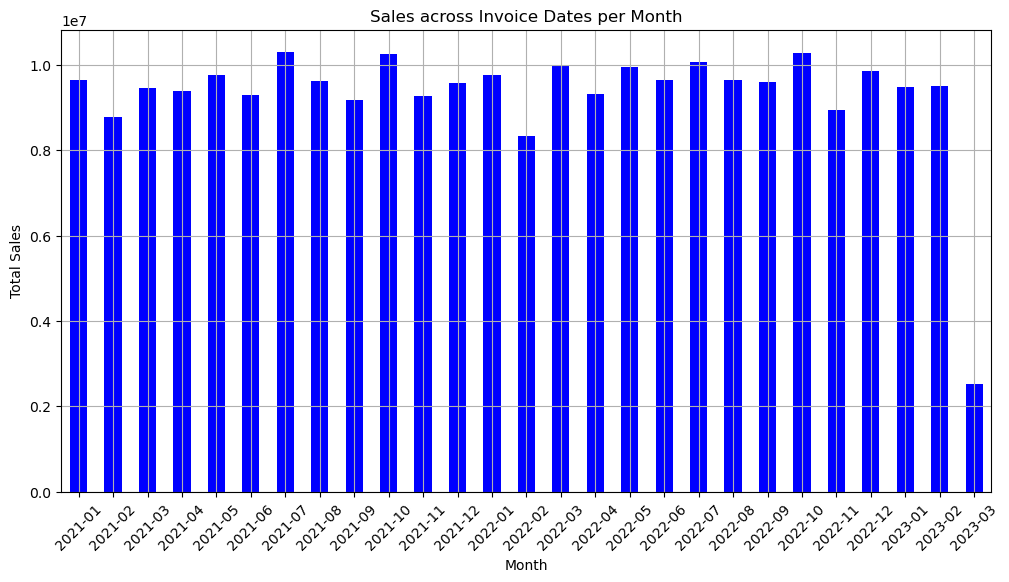

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

merged_df['invoice_date'] = pd.to_datetime(merged_df['invoice_date'], dayfirst=True)

merged_df['sales'] = merged_df['quantity'] * merged_df['price']

invoice_sales = merged_df.groupby(merged_df['invoice_date'].dt.strftime('%Y-%m'))['sales'].sum()

plt.figure(figsize=(12, 6))
invoice_sales.plot(kind='bar', color='blue')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Sales across Invoice Dates per Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**7. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).** For this I copypasted the initial code I made to make the merged dataframe 'mergedf_df', without expressing the invoice_date as datetime type. Afterwards, I then made a pivot table for the 'merged_df' dataframe, with the values being the prices of each invoice to reflect sales. For index, which reflects rows, I used 'category'. For columns, which reflects columns, I used 'age'. I also used .cut() to separate the ages into their decade age ranges. In doing so, the pivot table breaks down sales across the categorty and decade age range dimensions. 

REVISED
First, I made a new column to account for the decade ranges separated by 10. Afterward, I computed for sales by multiplying quantity to price. Then I made the pivot table showing the breakdown of sales across each category and each age group in the decade age range.

In [4]:
import pandas as pd

sales_df = pd.read_csv('fct_invoice.csv')
customer_df = pd.read_json('dim_customer.json')

customer_df.rename(columns={'id': 'customer_id'}, inplace=True)

merged_df = pd.merge(customer_df, sales_df, on='customer_id')

merged_df

,age,first_name,gender,customer_id,last_name,invoice_no,category,quantity,price,payment_method,invoice_date,shopping_mall
0,48.0,Nicholas,M,0,Flores,I254078,Shoes,3,1800.51,Cash,28/05/2021,Kanyon
1,48.0,Nicholas,M,0,Flores,I387354,Shoes,1,600.17,Cash,7/4/2021,Kanyon
2,48.0,Nicholas,M,0,Flores,I170558,Cosmetics,2,81.32,Cash,13/02/2021,Metropol AVM
3,48.0,Nicholas,M,0,Flores,I187874,Books,4,60.60,Cash,21/01/2023,Mall of Istanbul
4,48.0,Nicholas,M,0,Flores,I171870,Toys,3,107.52,Credit Card,1/8/2022,Istinye Park
...,...,...,...,...,...,...,...,...,...,...,...,...
99452,NaN,Arthur,M,9428,Harris,I216403,Cosmetics,5,203.30,Debit Card,4/7/2021,Mall of Istanbul
99453,NaN,David,M,9494,Roy,I203211,Cosmetics,1,40.66,Debit Card,9/7/2022,Metrocity
99454,85.0,Thomas,M,10350,Turner,I325731,Cosmetics,2,81.32,Cash,7/4/2021,Cevahir AVM
99455,NaN,April,F,10587,Sanchez,I478078,Clothing,5,1500.40,Credit Card,20/10/2022,Metrocity


In [21]:
import pandas as pd

merged_df['age_range'] = pd.cut(merged_df['age'], bins=range(0, 101, 10), right=False)

merged_df['total_sales'] = merged_df['quantity'] * merged_df['price']

question7 = pd.pivot_table(merged_df, values='total_sales', index='category', columns='age_range', aggfunc='sum', fill_value=0)

question7

age_range,"[0, 10)","[10, 20)","[20, 30)","[30, 40)","[40, 50)","[50, 60)","[60, 70)","[70, 80)","[80, 90)","[90, 100)"
category,,,,,,,,,,
Books,0,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00,0
Clothing,0,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00,0
Cosmetics,0,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60,0
Food & Beverage,0,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93,0
Shoes,0,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60,0
Souvenir,0,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06,0
Technology,0,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00,0
Toys,0,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80,0
